## Observations and Insights 

Pymaceuticals Observations

1. 250 mice were included in the study but due to a data collection error, only 248 were included in the analysis below. The mice were close to evenly split between male and female, 49.6% and 50.4% respectivly. The test was conducted over a 45 day period. Tumor size was meaurments were collected every 5 days. 10 different drugs were tested with 24 to 25 mice per drug.

2. There was a 84% correlation between Tumor Volume and Mouse Weight. 

3. At the end of the 45 day testing period, both Capomulin and Ramicane appeared to the most effective drugs in deministing tumor size. 




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
# Display the data table for preview

df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how ='left')
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice.
df['Mouse ID'].nunique()


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df["MouseID_Timepoint"] = df['Mouse ID'] + "_" + df['Timepoint'].astype(str)
dedup = df['MouseID_Timepoint'].value_counts()
dedup = dedup.reset_index() 
dedup.sort_values(by='MouseID_Timepoint',ascending=False)
dedup.head(10)

,index,MouseID_Timepoint
0,g989_10,2
1,g989_20,2
2,g989_15,2
3,g989_5,2
4,g989_0,2
5,a251_30,1
6,b879_5,1
7,y163_15,1
8,a262_0,1
9,g867_5,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df['Mouse ID'] == 'g989'
dupdate = df.loc[mask]
dupdate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),MouseID_Timepoint
107,g989,0,45.000000,0,Propriva,Female,21,26,g989_0
137,g989,0,45.000000,0,Propriva,Female,21,26,g989_0
329,g989,5,48.786801,0,Propriva,Female,21,26,g989_5
360,g989,5,47.570392,0,Propriva,Female,21,26,g989_5
620,g989,10,51.745156,0,Propriva,Female,21,26,g989_10
681,g989,10,49.880528,0,Propriva,Female,21,26,g989_10
815,g989,15,51.325852,1,Propriva,Female,21,26,g989_15
869,g989,15,53.442020,0,Propriva,Female,21,26,g989_15
950,g989,20,55.326122,1,Propriva,Female,21,26,g989_20
1111,g989,20,54.657650,1,Propriva,Female,21,26,g989_20


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2 = df['Mouse ID'] != 'g989'
cleandf = df.loc[mask2]
cleandf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),MouseID_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,b128_0
1,f932,0,45.000000,0,Ketapril,Male,15,29,f932_0
2,g107,0,45.000000,0,Ketapril,Female,2,29,g107_0
3,a457,0,45.000000,0,Ketapril,Female,11,30,a457_0
4,c819,0,45.000000,0,Ketapril,Male,21,25,c819_0
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,r944_45
1889,u364,45,31.023923,3,Capomulin,Male,18,17,u364_45
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,p438_45
1891,x773,45,58.634971,4,Placebo,Female,21,30,x773_45


In [9]:
# Checking the number of mice in the clean DataFrame.
cleandf['Mouse ID'].nunique()


248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary = pd.DataFrame(cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()).rename(columns = {'Tumor Volume (mm3)':'Mean'})
summary['Median'] = pd.DataFrame(cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
summary['Variance'] = pd.DataFrame(cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
summary['Standard Deviation'] = pd.DataFrame(cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
summary['SEM'] = pd.DataFrame(cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
cleandf.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [13]:
miceperdrug = cleandf.groupby("Drug Regimen")["Mouse ID"].nunique().reset_index().rename(columns={"Mouse ID" : "Number of Mice"})
miceperdrug

,Drug Regimen,Number of Mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


<function matplotlib.pyplot.show(close=None, block=None)>

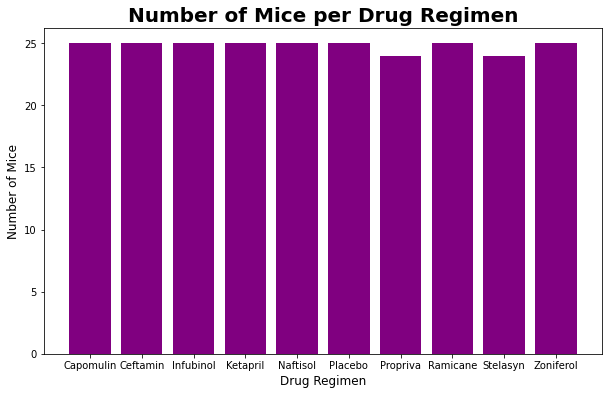

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(miceperdrug['Drug Regimen'],miceperdrug['Number of Mice'],color="purple")

plt.title("Number of Mice per Drug Regimen", fontsize = 20, fontweight="bold")
plt.xlabel("Drug Regimen",fontsize=12)
plt.ylabel("Number of Mice",fontsize=12)
plt.show


<AxesSubplot:title={'center':'Mice per Drug Regimen'}, xlabel='Drug Regimen'>

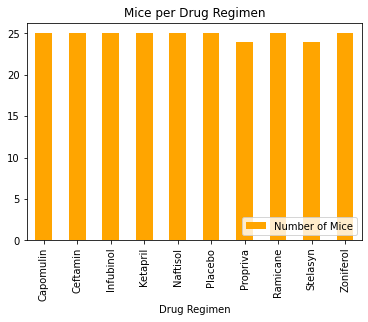

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
panda_bar = miceperdrug.plot.bar(x='Drug Regimen',y='Number of Mice',color='orange',title="Mice per Drug Regimen")
panda_bar.legend(loc=4)
panda_bar


<AxesSubplot:title={'center':'Male vs Female Mice'}, ylabel='Sex'>

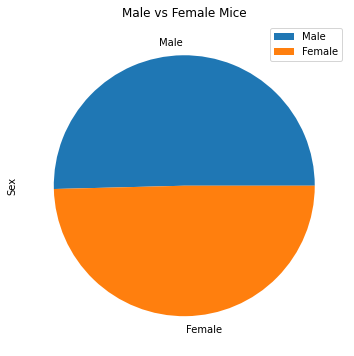

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = cleandf.loc[:,['Mouse ID','Sex']].drop_duplicates()
sex_counts = pd.DataFrame(mice_sex.Sex.value_counts())
plot = sex_counts.plot.pie(y="Sex",figsize=(6,6),title="Male vs Female Mice")
plot

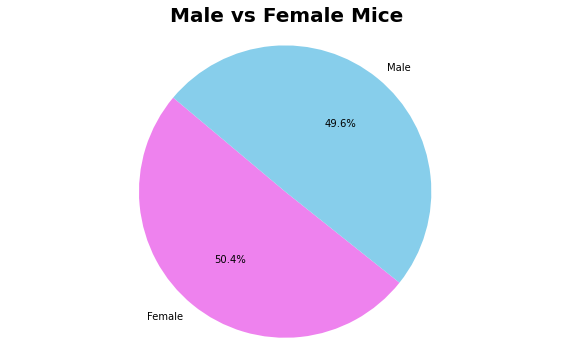

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = mice_sex.Sex.unique()
sex_counts = mice_sex.Sex.value_counts()
colors = ["violet","skyblue"]

plt.figure(figsize=(10,6))
plt.pie(sex_counts,labels=gender,colors=colors,autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Male vs Female Mice", fontsize=20, fontweight="bold")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
dfnew= cleandf[['Drug Regimen',"Mouse ID","Timepoint","Tumor Volume (mm3)"]]
dfnew.sort_values(by=(["Mouse ID","Drug Regimen","Timepoint"]),ascending=True)
dfnew2 = dfnew.drop_duplicates(subset=["Mouse ID","Drug Regimen"], keep='last')

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mask = [True if drug in drug_list else False for drug in dfnew2['Drug Regimen']]
final_results = dfnew2.loc[mask]
final_results = final_results.set_index('Mouse ID')
final_results

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
u153,Ceftamin,0,45.000000
b447,Ceftamin,0,45.000000
x226,Ceftamin,0,45.000000
t573,Ceftamin,0,45.000000
c326,Infubinol,5,36.321346
...,...,...,...
a644,Ramicane,45,32.978522
i177,Ramicane,45,33.562402
r944,Capomulin,45,41.581521


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

In [20]:
#Capomulin IQR and potential outliers
Capomulin = final_results.loc[final_results["Drug Regimen"] == 'Capomulin']
Capomulin['Tumor Volume (mm3)']
quartiles = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [21]:
#Ramicane IQR and potential outliers
Ramicane = final_results.loc[final_results["Drug Regimen"] == 'Ramicane']
Ramicane['Tumor Volume (mm3)']
quartiles = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [22]:
#Infubinol IQR and potential outliers
Infubinol = final_results.loc[final_results["Drug Regimen"] == 'Infubinol']
Infubinol['Tumor Volume (mm3)']
quartiles = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [23]:
#Ceftamin IQR and potential outliers
Ceftamin = final_results.loc[final_results["Drug Regimen"] == 'Ceftamin']
Ceftamin['Tumor Volume (mm3)']
quartiles = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

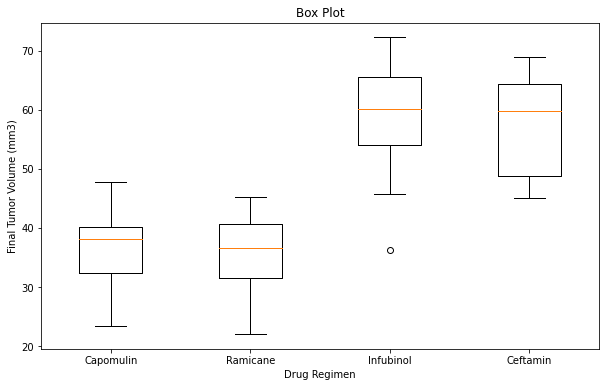

In [24]:
boxplot_data = [Capomulin['Tumor Volume (mm3)'],Ramicane['Tumor Volume (mm3)'],
                Infubinol['Tumor Volume (mm3)'],Ceftamin['Tumor Volume (mm3)']]
regimen_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1,= plt.subplots(figsize=(10,6))
ax1.set_title('Box Plot')
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(boxplot_data,labels = regimen_labels)
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

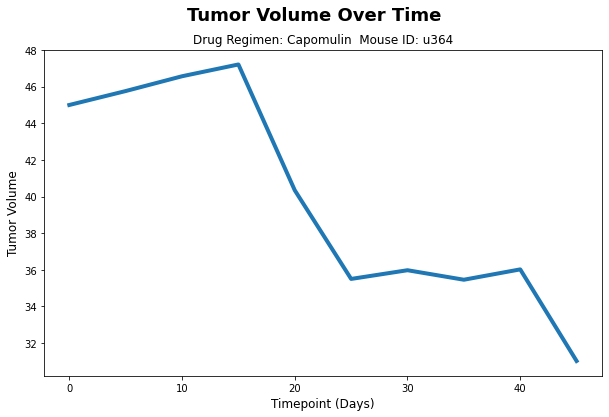

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_sample = cleandf.loc[(cleandf['Drug Regimen'] == "Capomulin") & (cleandf['Mouse ID']== 'u364')]
x_axis = cap_sample['Timepoint']

plt.figure(figsize=(10,6))
plt.plot(x_axis,cap_sample['Tumor Volume (mm3)'],linewidth=4)
plt.suptitle("Tumor Volume Over Time", fontsize = 18, fontweight="bold")
plt.title("Drug Regimen: Capomulin  Mouse ID: u364", fontsize = 12)
plt.xlabel('Timepoint (Days)',fontsize=12)
plt.ylabel("Tumor Volume",fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

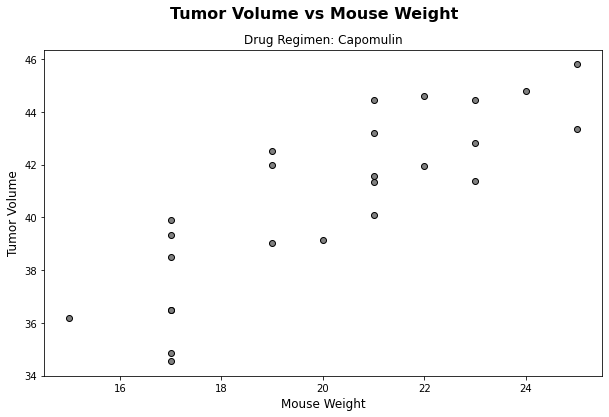

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_sample2 = cleandf.loc[cleandf['Drug Regimen'] == "Capomulin"]
avg_tumor_vol = cap_sample2.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
avg_tumor_weight = cap_sample2.groupby("Mouse ID")['Weight (g)'].mean()

plt.figure(figsize=(10,6))
plt.scatter(avg_tumor_weight,avg_tumor_vol,marker="o", facecolors="grey", edgecolors="black")
plt.suptitle("Tumor Volume vs Mouse Weight", fontsize = 16, fontweight="bold")
plt.title("Drug Regimen: Capomulin")
plt.xlabel("Mouse Weight",fontsize=12)
plt.ylabel("Tumor Volume",fontsize=12)
plt.show

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717
y = 0.95x + 21.55


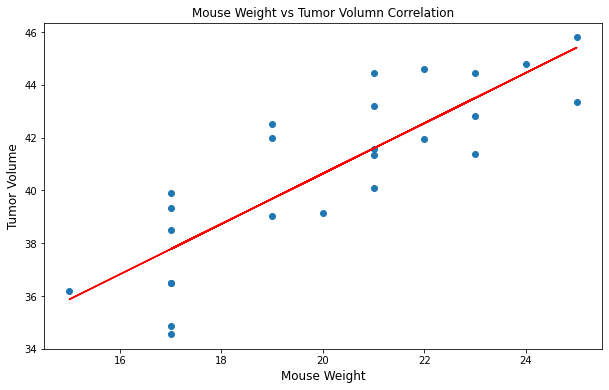

In [28]:
plt.figure(figsize=(10,6))
x_values = avg_tumor_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight vs Tumor Volumn Correlation")
plt.xlabel("Mouse Weight",fontsize=12)
plt.ylabel("Tumor Volume",fontsize=12)
correlation = st.pearsonr(avg_tumor_weight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()